In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

below is the main data set for this study downloaded from Kaggle

In [2]:
data = pd.read_csv("gun-violence-data.csv")

below is a data set that has all the states and their population

In [3]:
population = pd.read_excel("population.xlsx")

In [4]:
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [5]:
population.head()

,state,population
0,Alabama,4887871
1,Alaska,737438
2,Arizona,7171646
3,Arkansas,3013825
4,California,39557045


In [6]:
data.shape

(239677, 29)

we have 29 attributes; we will remove some and add some

In [7]:
data.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [8]:
data.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [9]:
data.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

below columns are not used in the study and they will be removed

In [10]:
data.drop(["incident_url", "address", "congressional_district", "sources", "source_url", "incident_url_fields_missing",
              "location_description", "participant_relationship", "state_house_district",
              "state_senate_district", "notes", 'incident_characteristics', 'participant_age', 
           'participant_status', 'participant_type','gun_type'], axis=1, inplace=True)

removing NA from latitude and longitude

In [11]:
data = data[np.isfinite(data['latitude'])]

adding 0::Unknown to empty values in the below column. and adding 0 to n_guns_involved

In [12]:
data.gun_stolen.fillna("0::Unknown", inplace=True) #clean
data.participant_age_group.fillna("0::Unknown", inplace=True) #clean
data.participant_gender.fillna("0::Unknown", inplace=True) #clean
data.n_guns_involved.fillna(0, inplace=True)

converting date to datetime 

In [13]:
data['date'] = pd.to_datetime(data['date']) 

creating new variables from date

In [14]:
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year
data["weekday"] = data["date"].dt.weekday
data['Day_of_year'] = data.date.dt.dayofyear

In [15]:
def clean_gun_stolen(row) :
    unknownCount = 0
    stolenCount = 0
    notstolenCount = 0
    gunstolen_row_values = []
    
    gunstolen_row = str(row).split("||")
    for x in gunstolen_row :
            gunstolen_row_value = str(x).split("::")
            if len(gunstolen_row_value) > 1 :
                gunstolen_row_values.append(gunstolen_row_value[1])
                if "Stolen" in gunstolen_row_value :
                    stolenCount += 1
                elif "Not-stolen" in gunstolen_row_value :
                    notstolenCount += 1
                else :
                    unknownCount += 1
                    
    return gunstolen_row_values


gunstolenvalues = data.gun_stolen.apply(clean_gun_stolen)
data["gun_stolen_Yes"] = gunstolenvalues.apply(lambda x: x.count("Stolen"))
data["gun_stolen_No"] = gunstolenvalues.apply(lambda x: x.count("Not-stolen"))
del(gunstolenvalues)

In [16]:
def clean_participant_gender(row) :
    gender_row_values = []
    gender_row = str(row).split("||")
    for x in gender_row :
        gender_row_value = str(x).split("::")
        if len(gender_row_value) > 1 :
            gender_row_values.append(gender_row_value[1])
            
    return gender_row_values


participant_genders = data.participant_gender.apply(clean_participant_gender)
data["participant_gender_total"] = participant_genders.apply(lambda x: len(x))
data["participant_gender_male"] = participant_genders.apply(lambda x: x.count("Male"))
data["participant_gender_female"] = participant_genders.apply(lambda x: x.count("Female"))
del(participant_genders)

In [17]:
def clean_participant_age_group(row) :
    unknownCount = 0
    childCount = 0
    teenCount = 0
    adultCount = 0
    agegroup_row_values = []
    
    agegroup_row = str(row).split("||")
    for x in agegroup_row :
        agegroup_row_value = str(x).split("::")
        if len(agegroup_row_value) > 1 :
            agegroup_row_values.append(agegroup_row_value[1])
            if "Child 0-11" in agegroup_row_value :
                childCount += 1
            elif "Teen 12-17" in agegroup_row_value :
                teenCount += 1
            elif "Adult 18+" in agegroup_row_value :
                adultCount += 1
            else :
                unknownCount += 1
                
    return agegroup_row_values

agegroupvalues = data.participant_age_group.apply(clean_participant_age_group)
data["agegroup_child"] = agegroupvalues.apply(lambda x: x.count("Child 0-11"))
data["agegroup_teen"] = agegroupvalues.apply(lambda x: x.count("Teen 12-17"))
data["agegroup_adult"] = agegroupvalues.apply(lambda x: x.count("Adult 18+"))
del(agegroupvalues)

In [18]:
data.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,latitude,longitude,n_guns_involved,...,weekday,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,agegroup_child,agegroup_teen,agegroup_adult
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,0::Unknown,40.3467,-79.8559,0.0,...,1,1,0,0,4,3,1,0,0,5
1,460726,2013-01-01,California,Hawthorne,1,3,0::Unknown,33.9090,-118.3330,0.0,...,1,1,0,0,1,1,0,0,0,4
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,41.4455,-82.1377,2.0,...,1,1,0,0,5,5,0,0,0,5
3,478925,2013-01-05,Colorado,Aurora,4,0,0::Unknown,39.6518,-104.8020,0.0,...,5,5,0,0,4,3,1,0,0,4
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,36.1140,-79.9569,2.0,...,0,7,0,0,4,2,2,0,1,3


In [19]:
data.shape

(231754, 26)

i have removed alot of columns but the number didn't decrease much because i added new variables

In [20]:
data.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,day,month,year,weekday,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,agegroup_child,agegroup_teen,agegroup_adult
count,2.317540e+05,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000,231754.000000
mean,5.516661e+05,0.246719,0.494209,37.546598,-89.338348,0.787171,15.762800,6.299939,2015.684817,3.057000,176.359437,0.071675,0.007668,1.590846,1.261316,0.175889,0.018589,0.104533,1.246857
std,2.925579e+05,0.519149,0.731516,5.130763,14.359546,3.684629,8.830095,3.436652,1.225676,2.023242,105.027770,0.902950,0.129913,1.038767,1.069967,0.453778,0.168089,0.412246,1.145590
min,9.211400e+04,0.000000,0.000000,19.111400,-171.429000,0.000000,1.000000,1.000000,2013.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.009188e+05,0.000000,0.000000,33.903400,-94.158725,0.000000,8.000000,3.000000,2015.000000,1.000000,84.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5.300570e+05,0.000000,0.000000,38.570600,-86.249600,1.000000,16.000000,6.000000,2016.000000,3.000000,176.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,8.123165e+05,0.000000,1.000000,41.437375,-80.048625,1.000000,23.000000,9.000000,2017.000000,5.000000,265.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000
max,1.083466e+06,50.000000,53.000000,71.336800,97.433100,400.000000,31.000000,12.000000,2018.000000,6.000000,366.000000,70.000000,25.000000,78.000000,61.000000,23.000000,11.000000,27.000000,103.000000


In [21]:
data.dtypes

incident_id                           int64
date                         datetime64[ns]
state                                object
city_or_county                       object
n_killed                              int64
n_injured                             int64
gun_stolen                           object
latitude                            float64
longitude                           float64
n_guns_involved                     float64
participant_age_group                object
participant_gender                   object
participant_name                     object
day                                   int64
month                                 int64
year                                  int64
weekday                               int64
Day_of_year                           int64
gun_stolen_Yes                        int64
gun_stolen_No                         int64
participant_gender_total              int64
participant_gender_male               int64
participant_gender_female       

In [22]:
data.isnull().sum()

incident_id                       0
date                              0
state                             0
city_or_county                    0
n_killed                          0
n_injured                         0
gun_stolen                        0
latitude                          0
longitude                         0
n_guns_involved                   0
participant_age_group             0
participant_gender                0
participant_name             119750
day                               0
month                             0
year                              0
weekday                           0
Day_of_year                       0
gun_stolen_Yes                    0
gun_stolen_No                     0
participant_gender_total          0
participant_gender_male           0
participant_gender_female         0
agegroup_child                    0
agegroup_teen                     0
agegroup_adult                    0
dtype: int64

no null values! except for pariticipant_name; it is going to be used to build a graph chart to show if there is any participant that is common. meaning the same person involved in multiple gun violence incidents

In [23]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,day,month,year,weekday,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,agegroup_child,agegroup_teen,agegroup_adult
incident_id,1,0.00429145,0.0102706,0.0193646,-0.0170312,0.11145,0.0147759,0.0495529,0.963781,-0.00389017,0.0515448,0.0366014,-0.0123001,-0.0272343,-0.0239859,-0.0240025,-0.0231379,0.00931179,-0.047708
n_killed,0.00429145,1,-0.119415,-0.0800784,-0.0621488,-0.022239,0.000603932,-0.00468439,0.00294679,0.0224662,-0.00458921,-0.0337105,0.000740943,0.232917,0.201212,0.205656,0.071211,0.026069,0.277145
n_injured,0.0102706,-0.119415,1,-0.0113787,0.0369619,-0.0409977,0.00239595,0.0161212,0.00696628,0.0577474,0.016228,-0.0492122,-0.00704723,0.302143,0.270712,0.168772,0.0609183,0.107361,0.287243
latitude,0.0193646,-0.0800784,-0.0113787,1,-0.0567135,0.0094729,0.00511076,0.0154011,0.0151678,0.0204142,0.0156782,0.00236902,-0.000350379,-0.0442016,-0.0311587,-0.0332121,-0.0187552,-0.00570806,-0.0444151
longitude,-0.0170312,-0.0621488,0.0369619,-0.0567135,1,-0.0170893,0.00449318,0.00651736,-0.016025,-0.000291518,0.00683628,-0.00339998,-0.00202762,-0.00457202,0.0021781,-0.0159962,-0.00536063,0.00642716,0.00352514
n_guns_involved,0.11145,-0.022239,-0.0409977,0.0094729,-0.0170893,1,-0.000514924,0.00752024,0.106334,-0.00816031,0.00758747,0.240903,0.0265757,0.0179914,0.00925842,-0.00167603,-0.00420895,-1.70491e-05,0.0085847
day,0.0147759,0.000603932,0.00239595,0.00511076,0.00449318,-0.000514924,1,0.00791527,-0.0043474,-4.724e-05,0.0917228,0.000759351,-0.00385737,-0.00107868,-0.00183412,0.0019782,-0.00191333,0.00259525,-0.00322001
month,0.0495529,-0.00468439,0.0161212,0.0154011,0.00651736,0.00752024,0.00791527,1,-0.168112,0.0082665,0.996454,0.00244135,-0.00857248,0.0243652,0.0241092,0.00421567,-0.000591118,0.000687361,0.00520764
year,0.963781,0.00294679,0.00696628,0.0151678,-0.016025,0.106334,-0.0043474,-0.168112,1,-0.00486928,-0.166729,0.0347212,-0.0100785,-0.0339606,-0.029728,-0.0268212,-0.0231262,0.00903186,-0.0521569
weekday,-0.00389017,0.0224662,0.0577474,0.0204142,-0.000291518,-0.00816031,-4.724e-05,0.0082665,-0.00486928,1,0.00822406,-0.00680189,-0.00253285,0.00565406,0.00482165,0.00412414,-0.000514573,-0.00859749,0.0136254


most dangerous states according to gun crimes

In [24]:
data.state.value_counts()

Illinois                16864
California              15992
Florida                 14619
Texas                   13017
Ohio                     9835
New York                 9496
Georgia                  8720
Pennsylvania             8572
North Carolina           8465
Louisiana                7747
Tennessee                7369
South Carolina           6749
Missouri                 6445
Massachusetts            5792
Michigan                 5781
Virginia                 5678
Maryland                 5647
Indiana                  5577
Alabama                  5374
New Jersey               5230
Wisconsin                4670
Kentucky                 4014
Mississippi              3497
Oklahoma                 3323
Washington               3310
District of Columbia     3095
Colorado                 3071
Connecticut              2987
Arkansas                 2754
Iowa                     2441
Minnesota                2279
Arizona                  2271
Oregon                   2217
Kansas    

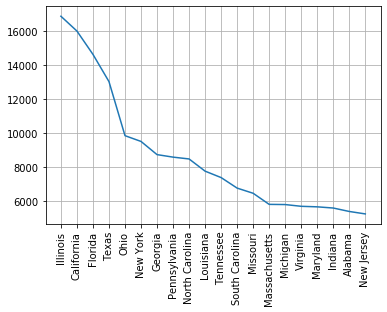

In [25]:
plt.plot(data.state.value_counts().head(20))
plt.xticks(rotation=90)
plt.grid()
plt.savefig('figures/total per states.png')

most dangerous cities according to gun crimes

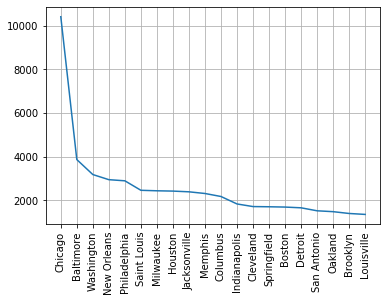

In [26]:
plt.plot(data.city_or_county.value_counts().head(20))
plt.xticks(rotation=90)
plt.grid()
plt.savefig('figures/total per city.png')

gun crimes distribution per year per gender

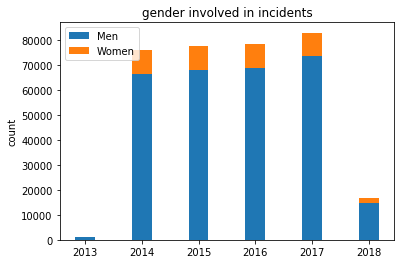

In [27]:
M = 6

m2013 = data[data.year == 2013].participant_gender_male.sum()
f2013 = data[data.year == 2013].participant_gender_female.sum()
m2014 = data[data.year == 2014].participant_gender_male.sum()
f2014 = data[data.year == 2014].participant_gender_female.sum()
m2015 = data[data.year == 2015].participant_gender_male.sum()
f2015 = data[data.year == 2015].participant_gender_female.sum()
m2016 = data[data.year == 2016].participant_gender_male.sum()
f2016 = data[data.year == 2016].participant_gender_female.sum()
m2017 = data[data.year == 2017].participant_gender_male.sum()
f2017 = data[data.year == 2017].participant_gender_female.sum()
m2018 = data[data.year == 2018].participant_gender_male.sum()
f2018 = data[data.year == 2018].participant_gender_female.sum()

maleCount = (m2013, m2014, m2015, m2016, m2017, m2018)
femaleCount = (f2013, f2014, f2015, f2016, f2017, f2018)

ind = np.arange(M)    
width = 0.35       


a1 = plt.bar(ind, maleCount, width)
b1 = plt.bar(ind, femaleCount, width, bottom=maleCount)

plt.ylabel('count')
plt.title('gender involved in incidents')
plt.xticks(ind, ('2013', '2014', '2015', '2016', '2017','2018'))
plt.legend((a1[0], b1[0]),('Men', 'Women'))
plt.savefig('figures/gender per year.png')
plt.show()

men vs women gun crimes

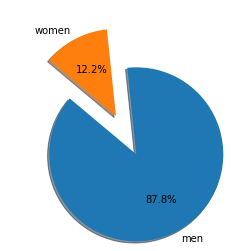

In [29]:
men = data.participant_gender_male.sum()
women = data.participant_gender_female.sum()
total = men + women

labels = 'men', 'women'
sizes = [men/total, women/total]
explode = (0.5,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('figures/gender ratio.png')
plt.show()

lets see if weekday affects gun crimes

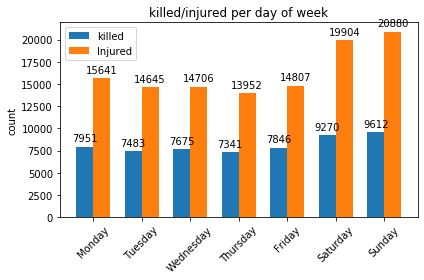

In [30]:
M = 7

labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']

mok = data[data.weekday == 0].n_killed.sum()
moi = data[data.weekday == 0].n_injured.sum()
tuk = data[data.weekday == 1].n_killed.sum()
tui = data[data.weekday == 1].n_injured.sum()
wek = data[data.weekday == 2].n_killed.sum()
wei = data[data.weekday == 2].n_injured.sum()
thk = data[data.weekday == 3].n_killed.sum()
thi = data[data.weekday == 3].n_injured.sum()
frk = data[data.weekday == 4].n_killed.sum()
fri = data[data.weekday == 4].n_injured.sum()
sak = data[data.weekday == 5].n_killed.sum()
sai = data[data.weekday == 5].n_injured.sum()
suk = data[data.weekday == 6].n_killed.sum()
sui = data[data.weekday == 6].n_injured.sum()

killedCount = (mok, tuk, wek, thk, frk, sak, suk)
injuredCount = (moi, tui, wei, thi, fri, sai, sui)

ind = np.arange(M)    
width = 0.35       

fig, ax = plt.subplots()
a1 = ax.bar(ind - width/2, killedCount, width)
b1 = ax.bar(ind + width/2, injuredCount, width)

ax.set_ylabel('count')
ax.set_title('killed/injured per day of week')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation=45)
ax.legend((a1[0], b1[0]),('killed', 'Injured'))


def autolabel(x):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in x:
        height = i.get_height()
        ax.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(a1)
autolabel(b1)

fig.tight_layout()
plt.savefig('figures/per weekday.png')
plt.show()

2013 barely has any data, 2018 only has data until march; if we are doing analysis per month, its best to use data from 2014 until 2017

In [31]:
data2 = data[data.year == 2014]
data2 = data2.append(data[data.year == 2015])
data2 = data2.append(data[data.year == 2016])
data2 = data2.append(data[data.year == 2017])

gun crimes per month

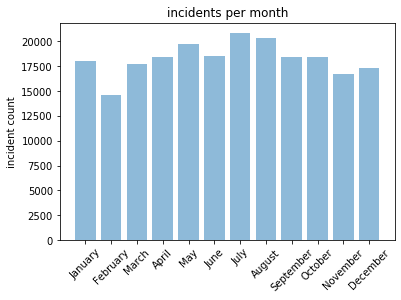

In [32]:
jan = data2[data2.month == 1].month.value_counts()
feb = data2[data2.month == 2].month.value_counts()
mar = data2[data2.month == 3].month.value_counts()
apr = data2[data2.month == 4].month.value_counts()
may = data2[data2.month == 5].month.value_counts()
jun = data2[data2.month == 6].month.value_counts()
jul = data2[data2.month == 7].month.value_counts()
aug = data2[data2.month == 8].month.value_counts()
sep = data2[data2.month == 9].month.value_counts()
octo = data2[data2.month == 10].month.value_counts()
nov = data2[data2.month == 11].month.value_counts()
dec = data2[data2.month == 12].month.value_counts()

Months = ('January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October','November', 'December')
ind = np.arange(len(Months))
incidentCount = [jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,17295]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('incident count')
plt.title('incidents per month')
plt.savefig('figures/per month.png')
plt.show()

gun crimes per year

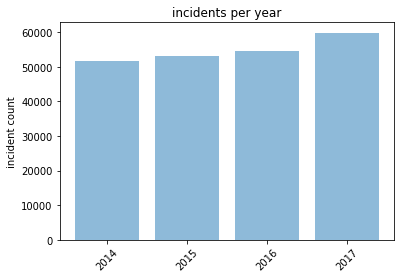

In [33]:
Years = ('2014', '2015', '2016', '2017')
ind = np.arange(len(Years))
incidentCount = [data[data.year == 2014].year.value_counts(),data[data.year == 2015].year.value_counts(),data[data.year == 2016].year.value_counts(),59812]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Years, rotation=45)
plt.ylabel('incident count')
plt.title('incidents per year')
plt.savefig('figures/per year.png')
plt.show()

preparing some data to check if national holidays affects gun crimes rate

In [34]:
data2014 = data[data.year == 2014]
data2015 = data[data.year == 2015]
data2016 = data[data.year == 2016]
data2017 = data[data.year == 2017]

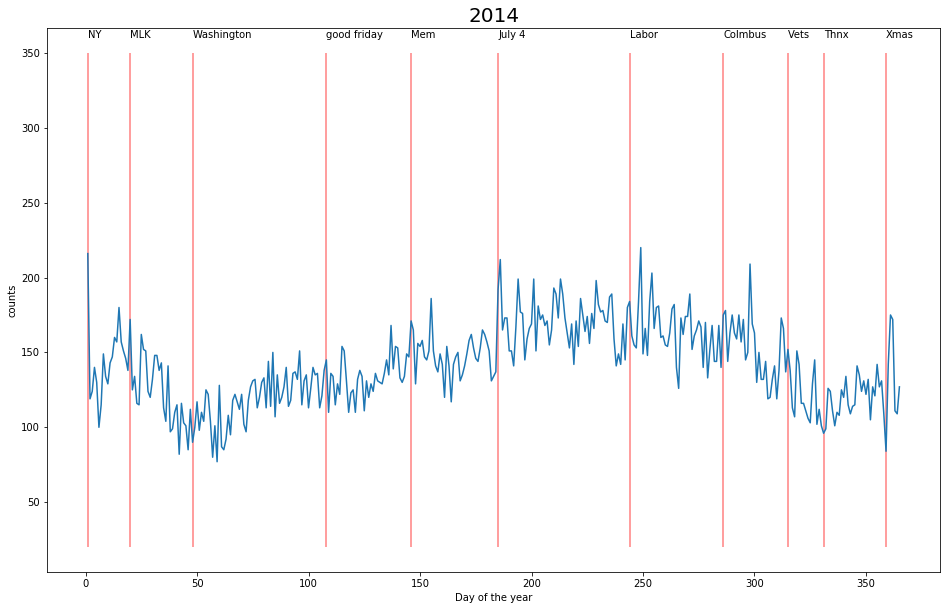

In [35]:
data_holidays2014 = data2014.groupby(['Day_of_year']).size().reset_index(name='counts')

holidays2014 = pd.Series(['2014-01-01', # New Years Day
                     '2014-01-20', # MLK Day
                     '2014-02-17', # Washington's Birthday
                     '2014-04-18', # Good Friday
                     '2014-05-26', # Memorial Day
                     '2014-07-04', # Independence Day
                     '2014-09-01', # Labor Day
                     '2014-10-13', # Columbus Day
                     '2014-11-11', # Veterans Day
                     '2014-11-27', # Thanksgiving
                     '2014-12-25']) # Christmas
holidays2014 = pd.to_datetime(holidays2014).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'Washington',
                 'good friday',
                 'Mem',
                 'July 4',
                 'Labor',
                 'Colmbus',
                 'Vets',
                 'Thnx',
                 'Xmas']

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_year', y='counts', ax=ax, data=data_holidays2014)
plt.xlabel('Day of the year')
plt.vlines(holidays2014, 20, 350, alpha=0.5, color ='r')
plt.title('2014', fontsize=20)
for i in range(len(holidays2014)):
    plt.text(x=holidays2014[i], y=360, s=holidays_names[i])
    
plt.savefig('figures/national holiday 2014.png')

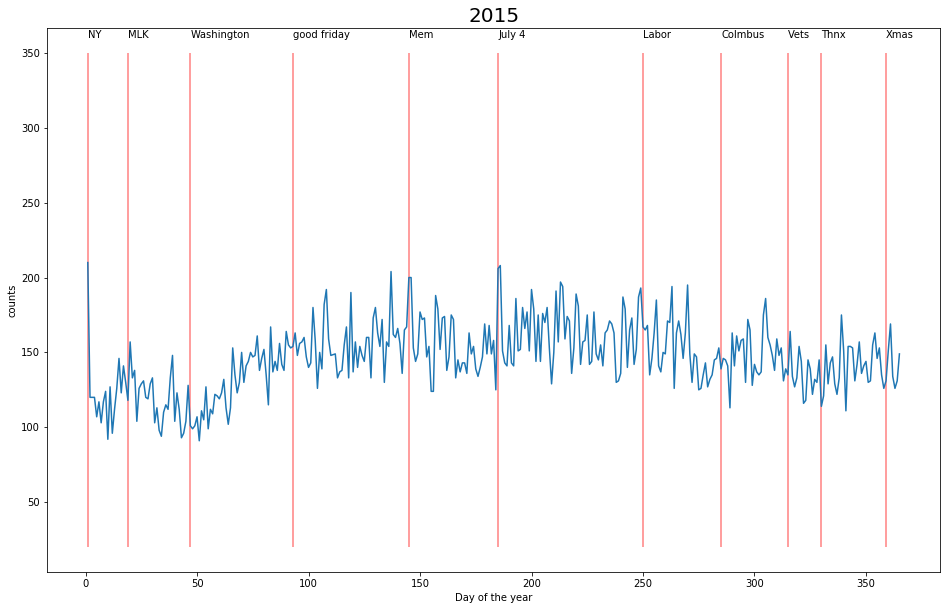

In [36]:
data_holidays2015 = data2015.groupby(['Day_of_year']).size().reset_index(name='counts')

holidays2015 = pd.Series(['2015-01-01', # New Years Day
                     '2015-01-19', # MLK Day
                     '2015-02-16', # Washington's Birthday
                     '2015-04-03', # Good Friday
                     '2015-05-25', # Memorial Day
                     '2015-07-04', # Independence Day
                     '2015-09-07', # Labor Day
                     '2015-10-12', # Columbus Day
                     '2015-11-11', # Veterans Day
                     '2015-11-26', # Thanksgiving
                     '2015-12-25']) # Christmas
holidays2015 = pd.to_datetime(holidays2015).dt.dayofyear

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_year', y='counts', ax=ax, data=data_holidays2015)
plt.xlabel('Day of the year')
plt.title('2015', fontsize=20)
plt.vlines(holidays2015, 20, 350, alpha=0.5, color ='r')
for i in range(len(holidays2015)):
    plt.text(x=holidays2015[i], y=360, s=holidays_names[i])
    
plt.savefig('figures/national holiday 2015.png')

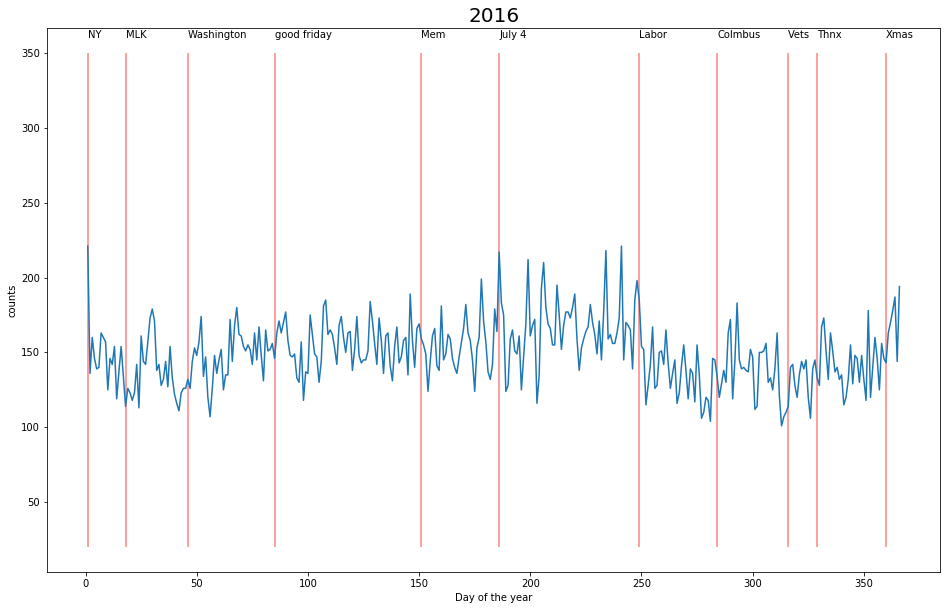

In [37]:
data_holidays2016 = data2016.groupby(['Day_of_year']).size().reset_index(name='counts')

holidays2016 = pd.Series(['2016-01-01', # New Years Day
                     '2016-01-18', # MLK Day
                     '2016-02-15', # Washington's Birthday
                     '2016-03-25', # Good Friday
                     '2016-05-30', # Memorial Day
                     '2016-07-04', # Independence Day
                     '2016-09-05', # Labor Day
                     '2016-10-10', # Columbus Day
                     '2016-11-11', # Veterans Day
                     '2016-11-24', # Thanksgiving
                     '2016-12-25']) # Christmas
holidays2016 = pd.to_datetime(holidays2016).dt.dayofyear

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_year', y='counts', ax=ax, data=data_holidays2016)
plt.xlabel('Day of the year')
plt.title('2016', fontsize=20)
plt.vlines(holidays2016, 20, 350, alpha=0.5, color ='r')
for i in range(len(holidays2016)):
    plt.text(x=holidays2016[i], y=360, s=holidays_names[i])
    
plt.savefig('figures/national holiday 2016.png')

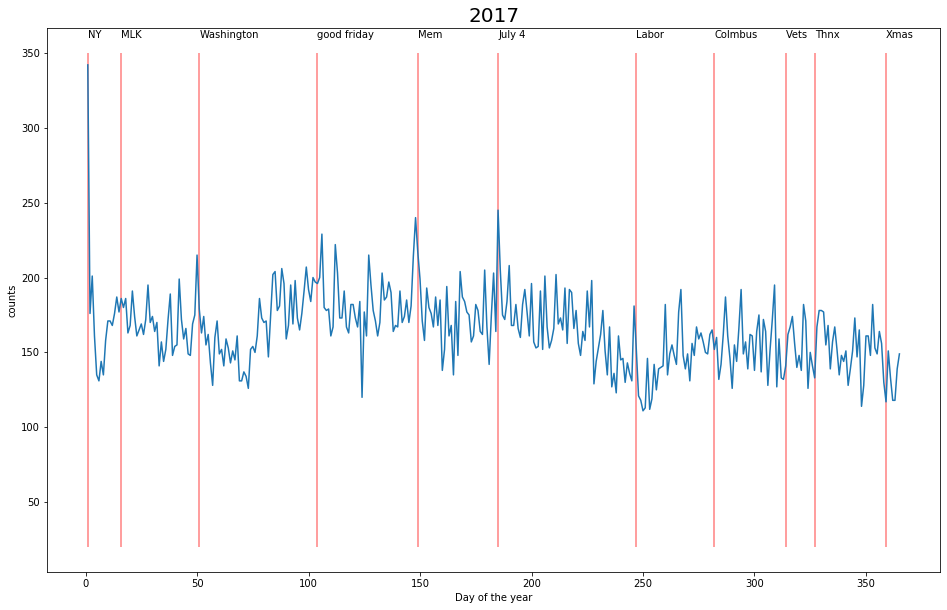

In [38]:
data_holidays2017 = data2017.groupby(['Day_of_year']).size().reset_index(name='counts')

holidays2017 = pd.Series(['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-02-20', # Washington's Birthday
                     '2017-04-14', # Good Friday
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-09', # Columbus Day
                     '2017-11-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25']) # Christmas
holidays2017 = pd.to_datetime(holidays2017).dt.dayofyear

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_year', y='counts', ax=ax, data=data_holidays2017)
plt.xlabel('Day of the year')
plt.title('2017', fontsize=20)
plt.vlines(holidays2017, 20, 350, alpha=0.5, color ='r')
for i in range(len(holidays2017)):
    plt.text(x=holidays2017[i], y=360, s=holidays_names[i])
    
plt.savefig('figures/national holiday 2017.png')

most serious gun crimes

In [39]:
data.sort_values(by='n_killed', ascending=False).head(10)

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,latitude,longitude,n_guns_involved,...,weekday,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,agegroup_child,agegroup_teen,agegroup_adult
130448,577157,2016-06-12,Florida,Orlando,50,53,0::Not-stolen||1::Not-stolen,28.5195,-81.3767,2.0,...,6,164,0,2,78,61,17,0,0,103
217151,980577,2017-11-05,Texas,Sutherland Springs,27,20,0::Unknown||1::Unknown||2::Unknown||3::Unknown,29.2733,-98.0564,4.0,...,6,309,0,0,42,19,23,11,3,29
232745,1049217,2018-02-14,Florida,Pompano Beach (Parkland),17,17,0::Not-stolen||1::Not-stolen,26.3045,-80.2694,2.0,...,2,45,0,2,35,17,18,0,27,8
101531,456893,2015-12-02,California,San Bernardino,16,19,0::Not-stolen||1::Not-stolen||2::Not-stolen||3...,34.0758,-117.2770,4.0,...,2,336,0,4,23,12,11,0,0,33
194,480366,2013-09-16,District of Columbia,Washington Navy Yard,11,3,0::Unknown||1::Unknown,38.8730,-76.9977,2.0,...,0,259,0,0,16,11,5,0,0,16
92624,423223,2015-10-01,Oregon,Roseburg,10,9,0::Unknown||1::Unknown||2::Unknown||3::Unknown...,43.2628,-123.2800,6.0,...,3,274,0,0,15,7,8,0,2,15
75530,359830,2015-06-17,South Carolina,Charleston,9,0,0::Unknown,32.7876,-79.9332,1.0,...,2,168,0,0,10,4,6,0,0,10
207904,930569,2017-09-10,Texas,Plano,9,1,0::Unknown,33.0560,-96.7261,1.0,...,6,253,0,0,10,6,4,0,0,10
70511,341622,2015-05-17,Texas,Waco,9,18,0::Unknown,31.5039,-97.1290,0.0,...,6,137,0,0,9,9,0,0,0,9
37527,192851,2014-09-18,Florida,Bell,8,0,0::Unknown,29.7555,-82.8626,0.0,...,3,261,0,0,8,5,3,6,0,2


crimes per age group

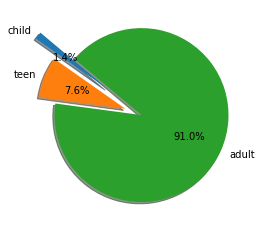

In [40]:
child = data.agegroup_child.sum()
teen = data.agegroup_teen.sum()
adult = data.agegroup_adult.sum()
total = data.shape[0]

labels = 'child', 'teen', 'adult'
sizes = [child/total, teen/total, adult/total]
explode = (0.5, 0.2,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('figures/age group ratio.png')
plt.show()

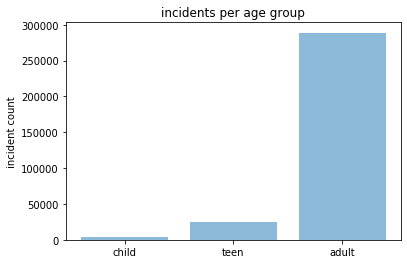

In [41]:
child = data.agegroup_child.sum()
teen = data.agegroup_teen.sum()
adult = data.agegroup_adult.sum()

age = ('child', 'teen', 'adult')
ind = np.arange(len(age))
counts = [child,teen,adult]


plt.bar(ind, counts, align='center', alpha=0.5)
plt.xticks(ind, age)
plt.ylabel('incident count')
plt.title('incidents per age group')


plt.show()

heat map to show the number of incidents per month per year

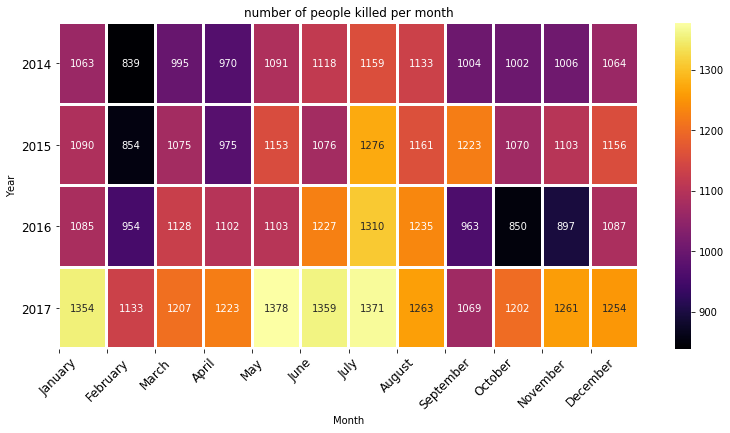

In [42]:
kills_my = pd.pivot_table(index="month",columns="year",data=data2,values="n_killed",aggfunc="sum").fillna(0)

Months = ('January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October','November', 'December')
ind = np.arange(len(Months))

for i in kills_my.columns:
    kills_my[i] = kills_my[i].astype(np.int64)
plt.figure(figsize=(13,6))
fig = sns.heatmap(kills_my.transpose(),cmap="inferno",
                  annot=True,fmt="d",linecolor="white",linewidths=2)
plt.xticks(ind, Months, fontsize =12, rotation = 45)
plt.yticks(fontsize =12,rotation=0)
plt.ylabel("Year")
plt.xlabel("Month")
plt.title("number of people killed per month")
plt.savefig('figures/heat map - count per month per year.png')
plt.show()

adding a count for incidents per state

In [43]:
population['incidents'] = [x for x in data.state.value_counts().sort_index()]

creating incident ratio for number of incidents per population of a state

In [44]:
population["incident_ratio"] = population.incidents/population.population

states that has the most gun incidents rate

In [45]:
most = population.sort_values('incident_ratio', ascending=False).head(10)

In [46]:
most

,state,population,incidents,incident_ratio
8,District of Columbia,702455,3095,0.004406
1,Alaska,737438,1292,0.001752
7,Delaware,967171,1643,0.001699
18,Louisiana,4659978,7747,0.001662
40,South Carolina,5084127,6749,0.001327
13,Illinois,12741080,16864,0.001324
24,Mississippi,2986530,3497,0.001171
0,Alabama,4887871,5374,0.001099
42,Tennessee,6770010,7369,0.001088
25,Missouri,6126452,6445,0.001052


states that has the least gun incidents rate

In [47]:
least = population.sort_values('incident_ratio', ascending=True).head(10)

In [48]:
least

,state,population,incidents,incident_ratio
11,Hawaii,1420491,277,0.000195
2,Arizona,7171646,2271,0.000317
44,Utah,3161105,1024,0.000324
12,Idaho,1754208,633,0.000361
4,California,39557045,15992,0.000404
23,Minnesota,5611179,2279,0.000406
47,Washington,7535591,3310,0.000439
43,Texas,28701845,13017,0.000454
32,New York,19542209,9496,0.000486
37,Oregon,4190713,2217,0.000529


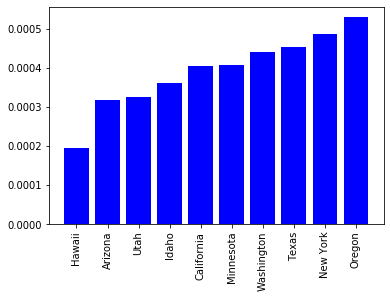

In [49]:
x = range(10)
plt.bar(x, least.incident_ratio, color='b')
plt.xticks(x, least.state, rotation=90)
plt.savefig('figures/low ratio.png')
plt.show()

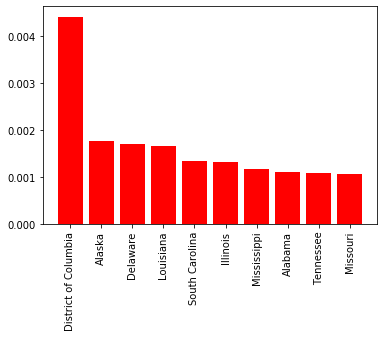

In [50]:
x = range(10)
plt.bar(x, most.incident_ratio, color='r')
plt.xticks(x, most.state, rotation=90)
plt.savefig('figures/high ratio.png')
plt.show()

take a look at the whole population list

In [51]:
population

,state,population,incidents,incident_ratio
0,Alabama,4887871,5374,0.001099
1,Alaska,737438,1292,0.001752
2,Arizona,7171646,2271,0.000317
3,Arkansas,3013825,2754,0.000914
4,California,39557045,15992,0.000404
5,Colorado,5695564,3071,0.000539
6,Connecticut,3572665,2987,0.000836
7,Delaware,967171,1643,0.001699
8,District of Columbia,702455,3095,0.004406
9,Florida,21299325,14619,0.000686


In [52]:
data.gun_stolen_Yes.sum()

16611

In [53]:
data.gun_stolen_No.sum()

1777

guns stolen or not stolen as per media coverage; look like its mentioned more when its stolen!

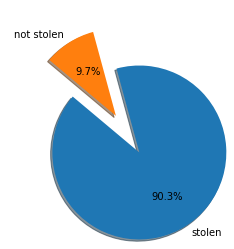

In [54]:
stolen = data.gun_stolen_Yes.sum()
notstolen = data.gun_stolen_No.sum()
total = stolen + notstolen

labels = 'stolen', 'not stolen'
sizes = [stolen/total, notstolen/total]
explode = (0.5,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('figures/stolen vs not stolen.png')
plt.show()

trying to find if there is a name repeated. meaning if the same person is involved in mulitple gun incidents

In [55]:
def clean_participant_name(row) :
    name_row_values = []
    name_row = str(row).split("||")
    for x in name_row :
        name_row_value = str(x).split("::")
        if len(name_row_value) > 1 :
                name_row_values.append(name_row_value[1])
            
    return name_row_values


participant_name = data.participant_name.apply(clean_participant_name)

In [56]:
name_list = '''0                                             [Julian Sims]
1                                          [Bernard Gillis]
2         [Damien Bell, Desmen Noble, Herman Seagers, La...
3         [Stacie Philbrook, Christopher Ratliffe, Antho...
4         [Danielle Imani Jameison, Maurice Eugene Edmon...
5         [Rebeika Powell, Kayetie Melchor, Misty Nunley...
6         [Greg Griego, Sara Griego, Zephania Griego, Ja...
7                                                        []
8                                                        []
9                                           [Deshaun Jones]
10                                        [Demetrius Davis]
11                                     [Terry Robinson Jr.]
12        [Ofc., Dep., Dep., Eddie Lyons, Wilbert Thibod...
13                                                       []
14        [Ernest Edwards, Anthony Clark, Joshua Clay, R...
15                                     [Mary, Sundra Payne]
16        [Teng Yang, Tou Yang, Xong Yang, Yang Vue, Kon...
17                                                       []
18        [Malcolm "London" Hall, Brandon Brown, Deron B...
19                                           [Oscar Garcia]
20        [Laura Elizabeth "Beth" Mulford, Christine Bel...
21        [Omar Paul Jarman, Shontay N. Young, Danielle ...
22        [Courtney Aoki, Melvin Edwards, Jeremy Lewis, ...
23                                [Chaz Fain, Mark Hopkins]
24                                   [Marcus Antoine Smith]
25                                                       []
26                                    [Frank Fletcher, Jr.]
27        [Chauncey "Trey" Boulevard, Jr., Jumarco Danie...
28        [James L. Key, Eric Debruce, Margaret White-Tu...
29                                         [Edgar G. Jones]'''.split('\n')
lines = [[name.strip() for name in line[line.find('[')+1:line.find(']')].split(',')] for line in name_list]
names = [name.strip() for line in lines for name in line if name]
seen = set()
dups = set(name for name in names if name in seen or seen.add(name))

if len(dups) == 0: print("No duplicates.")

info = {name:[] for name in dups}
for i in range(len(lines)):
    for name in dups:
        if name in lines[i]: info[name].append(i)
print(info)

{'Dep.': [12], 'Jr.': [26, 27]}


In [57]:
name_list = participant_name.tolist()
len(name_list)
name_list = name_list.split('\n')
lines = [[name.strip() for name in line[line.find('[')+1:line.find(']')].split(',')] for line in name_list]
names = [name.strip() for line in lines for name in line if name]
seen = set()
dups = set(name for name in names if name in seen or seen.add(name))

if len(dups) == 0: print("No duplicates.")

info = {name:[] for name in dups}
for i in range(len(lines)):
    for name in dups:
        if name in lines[i]: info[name].append(i)
print(info)

AttributeError: 'list' object has no attribute 'split'

In [58]:
print(participant_name)

0                                             [Julian Sims]
1                                          [Bernard Gillis]
2         [Damien Bell, Desmen Noble, Herman Seagers, La...
3         [Stacie Philbrook, Christopher Ratliffe, Antho...
4         [Danielle Imani Jameison, Maurice Eugene Edmon...
5         [Rebeika Powell, Kayetie Melchor, Misty Nunley...
6         [Greg Griego, Sara Griego, Zephania Griego, Ja...
7                                                        []
8                                                        []
9                                           [Deshaun Jones]
10                                        [Demetrius Davis]
11                                     [Terry Robinson Jr.]
12        [Ofc., Dep., Dep., Eddie Lyons, Wilbert Thibod...
13                                                       []
14        [Ernest Edwards, Anthony Clark, Joshua Clay, R...
15                                     [Mary, Sundra Payne]
16        [Teng Yang, Tou Yang, Xong Yan